In [63]:
from datascience import *
from datascience.predicates import are
import numpy as np
from scipy import stats
from scipy import misc

import matplotlib
matplotlib.use('Agg', warn=False)
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [64]:
# Function from Monday 6/6 Lec 2

def simulate_statistic(table, column_label, statistic, sample_size, repetitions):
    # assumes statistic(table, column_label, sample_size) returns
    # simulation of statistic based on one random sample
    return np.array([statistic(table, column_label, sample_size) for i in range(repetitions)])

In [65]:
# Function from Monday 6/6 Lec 2

def empirical_distribution(table, column_label, statistic, sample_size, repetitions):
    stats = simulate_statistic(table, column_label, statistic, sample_size, repetitions)
    Table().with_column('statistic', stats).hist(bins=20)
    plots.xlabel('value of '+ statistic.__name__)
    plots.title('Empirical Distribution ('+str(repetitions)+' samples)')

In [66]:
# Suppose there are N planes.
# Put all their serial numbers in a table.

N = 300
planes = Table().with_column('Serial Number', np.arange(1, N+1, 1))
planes

Serial Number
1
2
3
4
5
6
7
8
9
10


In [67]:
# Sample 5 planes at random with replacement, 
# The result is a table.

sample5 = planes.sample(5, with_replacement=True)
sample5

Serial Number
11
36
250
140
260


In [68]:
# Find the max using a Table method.
# The result is a table.

sample5.max()

Serial Number
260


In [69]:
# But we just want the number (the max), not a table.
# So extract the array of just the values in the table.

sample5.column('Serial Number')

array([ 11,  36, 250, 140, 260])

In [70]:
# Find the max of the array.
# This is a number, not a table.

max(sample5.column('Serial Number'))

260

In [71]:
# Define a function that returns this statistic:
# the max of a random sample (with replacement) of a specified size.

def random_sample_max(table, label, sample_size):
    return max(table.sample(sample_size, with_replacement=True).column(label))

In [72]:
random_sample_max(planes, 'Serial Number', 30)

300

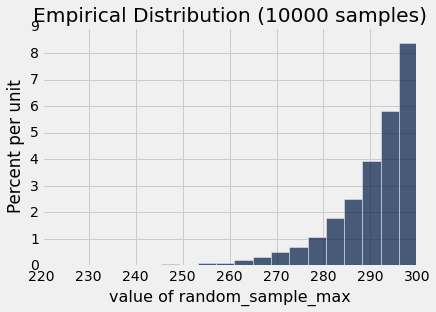

In [73]:
empirical_distribution(planes, 'Serial Number', random_sample_max, 30, 10000)

In [74]:
# Another statistic that can be used to estimate N:
# 2 times the sample average

def random_sample_twice_mean(table, column_label, sample_size):
    return 2*np.mean(table.sample(sample_size, with_replacement=True).column(column_label))

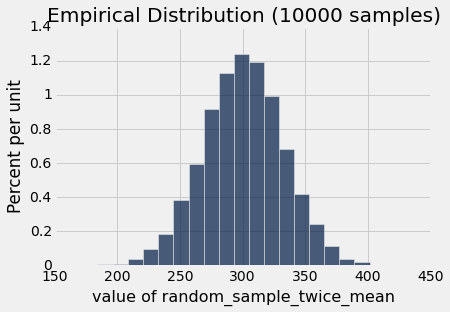

In [75]:
empirical_distribution(planes, 'Serial Number', random_sample_twice_mean, 30, 10000)

In [76]:
# Define a function that simulates both statistics
# and draws both histograms on the same axes.

def empirical_distribution_both(sample_size, repetitions):
    
    # Simulate the two statistics.
    maxes = simulate_statistic(planes, 'Serial Number', random_sample_max, sample_size, repetitions)
    twice_means = simulate_statistic(planes, 'Serial Number', random_sample_twice_mean, sample_size, repetitions)
    
    # Put the results in a table and draw the histograms.
    Table().with_columns([
            'Sample Max', maxes,
            '2 * Sample Mean', twice_means
        ]).hist(bins=np.arange(201, 400, 10))
    
    # Fix the two scales for ease of comparison, and label the plot. 
    plots.xlim(200, 400)
    plots.ylim(0, 0.1)
    plots.xlabel('Statistic based on sample size '+str(sample_size))
    plots.title('Empirical Distribution ('+str(repetitions)+' samples)')
    

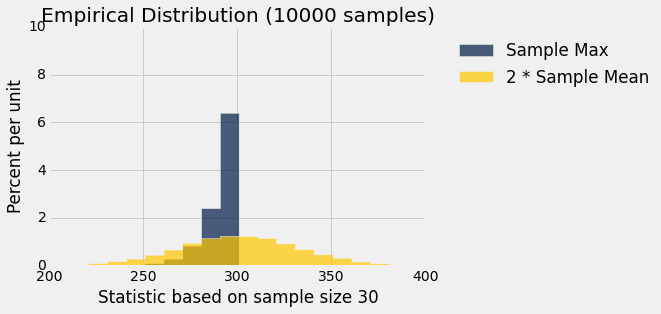

In [77]:
empirical_distribution_both(30, 10000)

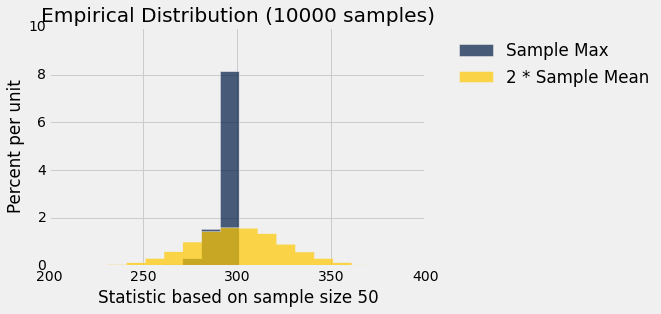

In [78]:
# Increase the sample size.

empirical_distribution_both(50, 10000)